In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from joblib import Parallel, delayed
from sklearn.exceptions import DataConversionWarning
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, accuracy_score

In [2]:
file_path = "ass2.pickle"
data = pd.read_pickle(file_path)

# Data Analysis

In [3]:
print(f"size of train: {len(data['train'])}")
print(f"shape of train: {data['train'].shape}")

print(f"size of dev: {len(data['dev'])}")
print(f"shape of dev: {data['dev'].shape}")

print(f"size of test: {len(data['test'])}")
print(f"shape of test: {data['test'].shape}")

size of train: 40533
shape of train: (40533, 43)
size of dev: 13512
shape of dev: (13512, 43)
size of test: 13512
shape of test: (13512, 43)


The unique values are [0 1 2]

Balanced/Imbalanced check:
Target 0- there are 3917 samples
Target 1- there are 9882 samples
Target 2- there are 26734 samples

The scales of the features are: 



f0        0.834109
f1        0.779471
f2        0.612657
f3        0.448263
f4        0.290031
f5        0.119114
f6        0.838151
f7        0.793958
f8        0.627516
f9        0.457701
f10       0.279183
f11       0.116746
f12       0.812020
f13       0.809129
f14       0.649946
f15       0.474740
f16       0.289494
f17       0.119321
f18       0.836935
f19       0.745456
f20       0.556472
f21       0.384355
f22       0.228490
f23       0.094565
f24       0.691686
f25       0.623876
f26       0.431877
f27       0.264231
f28       0.142697
f29       0.044405
f30       0.795576
f31       0.690584
f32       0.495698
f33       0.303588
f34       0.152614
f35       0.046832
f36       0.832101
f37       0.724840
f38       0.525442
f39       0.330019
f40       0.155936
f41       0.042993
target    0.662817
dtype: float64

The variance of the features are: 



f0        0.695738
f1        0.607575
f2        0.375348
f3        0.200940
f4        0.084118
f5        0.014188
f6        0.702496
f7        0.630370
f8        0.393776
f9        0.209491
f10       0.077943
f11       0.013630
f12       0.659376
f13       0.654690
f14       0.422429
f15       0.225378
f16       0.083807
f17       0.014237
f18       0.700460
f19       0.555705
f20       0.309662
f21       0.147729
f22       0.052208
f23       0.008943
f24       0.478429
f25       0.389221
f26       0.186518
f27       0.069818
f28       0.020362
f29       0.001972
f30       0.632941
f31       0.476906
f32       0.245717
f33       0.092166
f34       0.023291
f35       0.002193
f36       0.692393
f37       0.525392
f38       0.276089
f39       0.108912
f40       0.024316
f41       0.001848
target    0.439326
dtype: float64

summary statistics of the dataset: 



,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f33,f34,f35,f36,f37,f38,f39,f40,f41,target
count,40533.000000,40533.000000,40533.000000,40533.000000,40533.000000,40533.000000,40533.000000,40533.000000,40533.000000,40533.000000,...,40533.000000,40533.000000,40533.000000,40533.000000,40533.000000,40533.000000,40533.000000,40533.000000,40533.000000,40533.000000
mean,0.959539,0.540054,0.270890,0.131745,0.051982,0.009844,1.064269,0.582982,0.288407,0.137912,...,0.059260,0.014877,0.001604,0.838749,0.427331,0.188587,0.069992,0.016036,0.001406,1.562924
std,0.834109,0.779471,0.612657,0.448263,0.290031,0.119114,0.838151,0.793958,0.627516,0.457701,...,0.303588,0.152614,0.046832,0.832101,0.724840,0.525442,0.330019,0.155936,0.042993,0.662817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


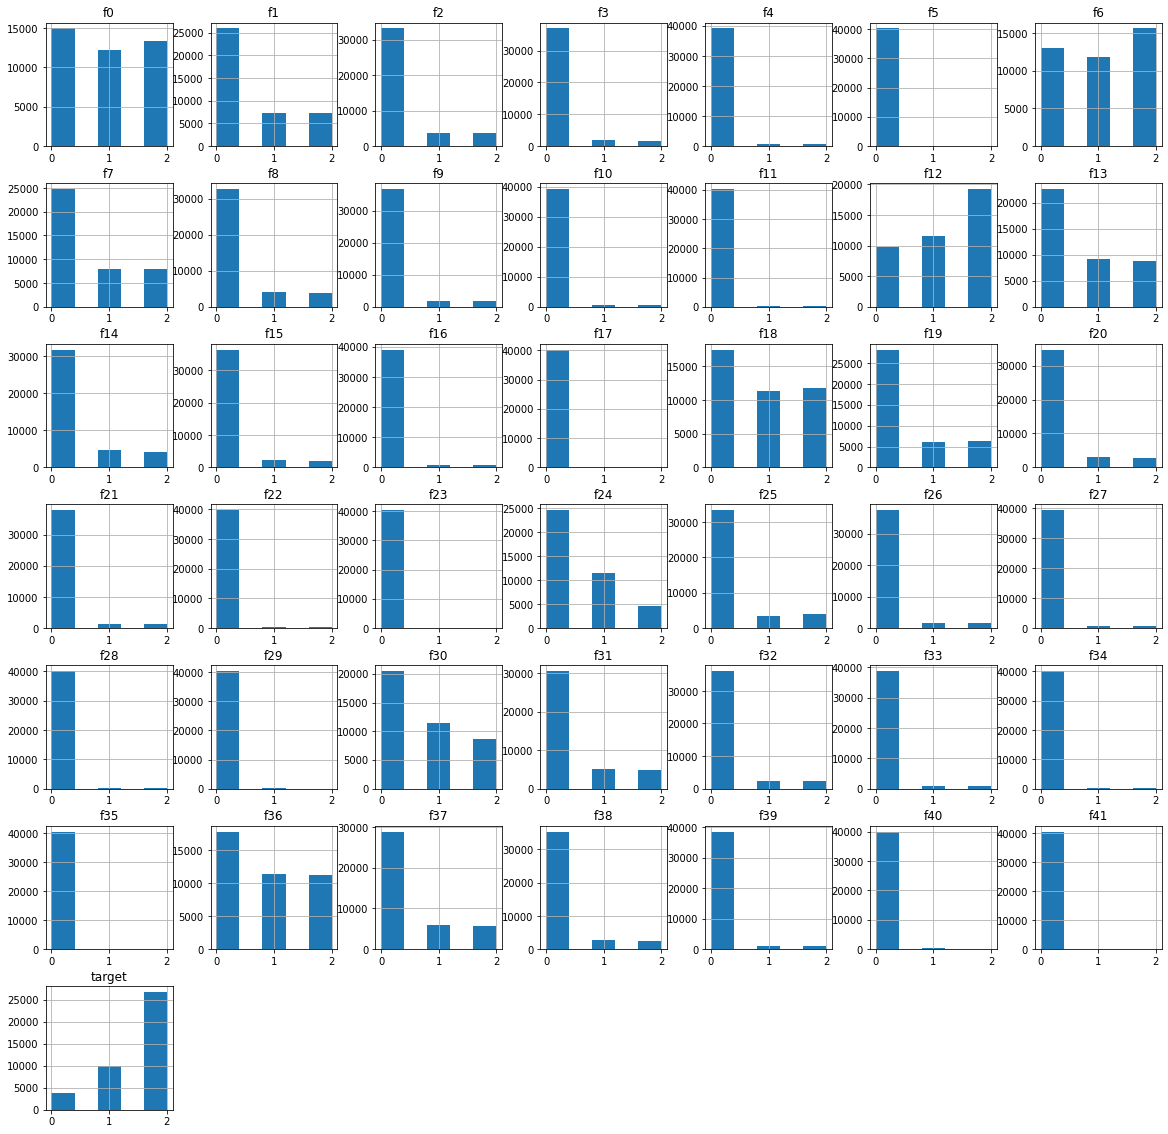

In [24]:
train_df = pd.DataFrame(data['train'])

print(f"The unique values are {np.unique(train_df)}\n")

print('Balanced/Imbalanced check:')
print(f"Target 0- there are {train_df['target'].value_counts()[0]} samples")
print(f"Target 1- there are {train_df['target'].value_counts()[1]} samples")
print(f"Target 2- there are {train_df['target'].value_counts()[2]} samples\n")

print(f"The scales of the features are: \n")
display(train_df.std())

print(f"The variance of the features are: \n")
display(train_df.var())

print(f"summary statistics of the dataset: \n")
display(train_df.describe())

train_df.hist(figsize=(20, 20), bins=5)
plt.show()

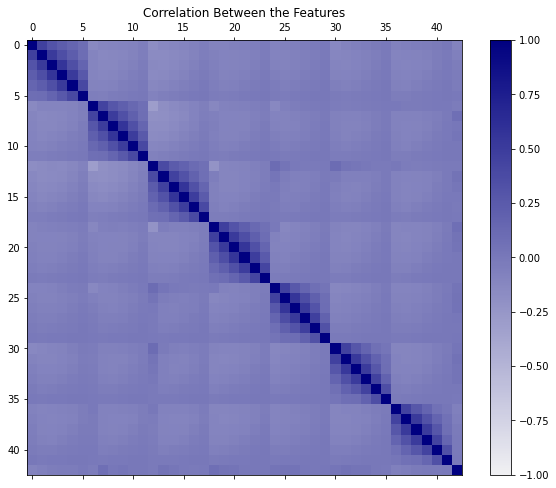

In [5]:
correlation = train_df.corr()

cmap = sns.light_palette("navy", as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.matshow(correlation, cmap=cmap, vmin=-1, vmax=1)

fig.colorbar(im)
ax.set_title("Correlation Between the Features")

plt.show()


# Selecting the model

#### The models we decided to check are:
- RandomForest
- AdaBoost
- KNN
- XGB
- SVC

In order to check which model fits the best to our dataset, we will run a grid search on the different models.
In addition, each model will run on multiple hyperparameters to improve our model selection.  

In [6]:
X_train = pd.DataFrame(data['train'].iloc[:,:-1].values)
y_train = pd.DataFrame(data['train'].iloc[:,-1:].values)

X_validation = pd.DataFrame(data['dev'].iloc[:,:-1].values)
y_validation = pd.DataFrame(data['dev'].iloc[:,-1:].values)

X_test = pd.DataFrame(data['test'].iloc[:,:-1].values)
y_test = pd.DataFrame(data['test'].iloc[:,-1:].values)

In [7]:
X_full_train = np.concatenate((X_train, X_validation), axis=0)
y_full_train = np.concatenate((y_train, y_validation), axis=0)
test_s = np.zeros(X_full_train.shape[0])
test_s[:X_train.shape[0]] = -1
predefined_split = PredefinedSplit(test_s)

In [8]:
models = [
          ('RandomForest', RandomForestClassifier()), 
          ('AdaBoost', AdaBoostClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('XGB', XGBClassifier()),
          ('SVC', SVC())
        ]

param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100],
        'criterion': ['gini', 'entropy'],
        'max_features': ['sqrt', 'log2']
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.5, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    'KNN': {
        'n_neighbors': [1, 10],
        'weights': ['uniform', 'distance'],
        'p': [1, 2],
        'leaf_size': [10, 50]
    },
    'XGB': {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.5, 1.0],
        'max_depth': [3, 7],
        'gamma': [0.1, 1, 5]
    },
    'SVC': {
        'C': [1.0, 2.0, 3.0],
        'kernel': ['linear', 'sigmoid'],
        'degree': [1, 3],
        'gamma': ['scale', 'auto']
    }
}

scoring=['accuracy', 'f1_weighted']


In [9]:
# Define the number of parallel jobs
num_jobs = -1  # Set to -1 to use all available cores, or specify the desired number of cores

results = {}

def train_model(model):
    model_name = model[0]
    grid_search = GridSearchCV(estimator=model[1], param_grid=param_grid[model_name], cv=predefined_split, scoring=scoring, refit='accuracy')
    grid_search.fit(X_full_train, y_full_train)
    best_f1_weighted_score = max(grid_search.cv_results_['mean_test_f1_weighted'])
    best_accuracy_score = max(grid_search.cv_results_['mean_test_accuracy'])
    return model_name, best_f1_weighted_score, best_accuracy_score

results = Parallel(n_jobs=num_jobs)(delayed(train_model)(model) for model in models)


In [10]:
model_results = {
    'RandomForest': {
        'F1 Weighted': 0.7842994234796862,
        'Accuracy': 0.8119449378330373
    },
    'AdaBoost': {
        'F1 Weighted': 0.6957792069253603,
        'Accuracy': 0.7441533451746596
    },
    'KNN': {
        'F1 Weighted': 0.7463454528927356, 
        'Accuracy': 0.7744227353463587
    },
    'XGB': {
        'F1 Weighted': 0.8454657589567671, 
        'Accuracy': 0.8531675547661338
    },
    'SVC': {
        'F1 Weighted': 0.5214968113378141, 
        'Accuracy': 0.6563795145056246
    }
}

In [11]:
final_result = {}
for result in results:
    model_name = result[0]
    best_f1_weighted_score = result[1]
    best_accuracy_score = result[2]
    final_result[model_name] = {'F1 Weighted': best_f1_weighted_score, 'Accuracy': best_accuracy_score}
print("Finished training model all models")

Finished training model all models


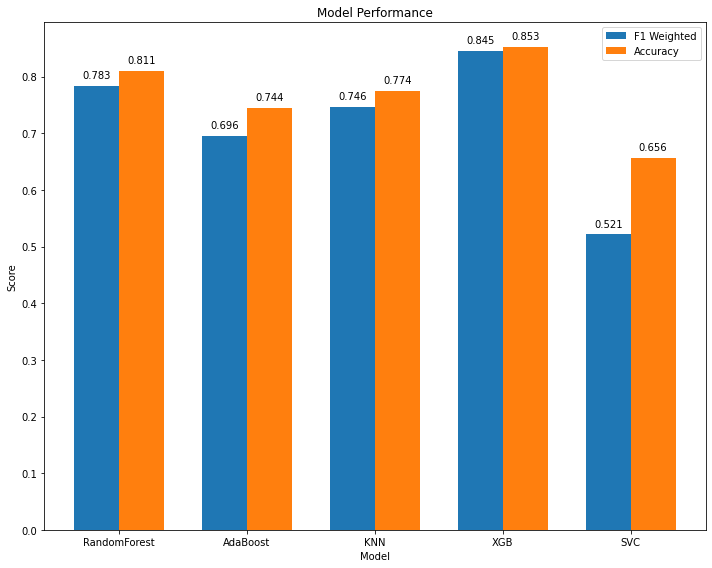

In [12]:
model_names = list(final_result.keys())
f1_weighted_scores = [final_result[model]['F1 Weighted'] for model in model_names]
accuracy_scores = [final_result[model]['Accuracy'] for model in model_names]
fig, ax = plt.subplots(figsize=(10,8))

bar_width = 0.35

index = np.arange(len(model_names))
bar1_positions = index - bar_width / 2
bar2_positions = index + bar_width / 2

plt.bar(bar1_positions, f1_weighted_scores, bar_width, label='F1 Weighted')

plt.bar(bar2_positions, accuracy_scores, bar_width, label='Accuracy')

plt.xticks(index, model_names)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance')

for i, v in enumerate(f1_weighted_scores):
    plt.text(bar1_positions[i], v + 0.01, str(round(v, 3)), ha='center', va='bottom')

for i, v in enumerate(accuracy_scores):
    plt.text(bar2_positions[i], v + 0.01, str(round(v, 3)), ha='center', va='bottom')


plt.legend()

plt.tight_layout()
plt.show()

As we can see, the model with the best prediction is XGB with accuracy matric- 85.3% success

# Preprocessing 

In [13]:
chosen_model = XGBClassifier()

XGB_param_grid = {
    'XGB': {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.5, 1.0],
        'max_depth': [3, 7],
        'gamma': [0.1, 1, 5]
    }
}

#### 1. Feature Scaling

first, we'll examine if scaling the features would affect the predition and how. 

In [14]:
scaler = StandardScaler()

X_full_train_scaled = scaler.fit_transform(X_full_train)

def train_XGB_model():
    grid_search = GridSearchCV(estimator=chosen_model, param_grid=XGB_param_grid['XGB'], cv=predefined_split, scoring=scoring, refit='accuracy')
    grid_search.fit(X_full_train_scaled, y_full_train)
    scaled_best_f1_weighted_score = max(grid_search.cv_results_['mean_test_f1_weighted'])
    scaled_best_accuracy_score = max(grid_search.cv_results_['mean_test_accuracy'])
    return scaled_best_f1_weighted_score, scaled_best_accuracy_score

scaled_results = train_XGB_model()

In [15]:
print("Before scaling:")
print("---------------")
print(f"The F1 Weighted - {final_result['XGB']['F1 Weighted']}")
print(f"The Accuracy - {final_result['XGB']['Accuracy']}\n")

print("After scaling:")
print("--------------")
print(f"The F1 Weighted - {scaled_results[0]}")
print(f"The Accuracy - {scaled_results[1]}")

Before scaling:
---------------
The F1 Weighted - 0.8454657589567671
The Accuracy - 0.8531675547661338

After scaling:
--------------
The F1 Weighted - 0.8454657589567671
The Accuracy - 0.8531675547661338


As we can see, the scaling process did not change the prediction.

#### 2. Dimensionality Reduction

Now, we'll examine how reducing the number features would affect the predition. 

We will do so by using the method we learned to select the K best features.

In [16]:
k_features = [5,10,20,30,40,42]

def train_XGB_model_with_k(k):
    grid_search = GridSearchCV(estimator=chosen_model, param_grid=XGB_param_grid['XGB'], cv=predefined_split, scoring=scoring, refit='accuracy')
    selector = SelectKBest(f_classif, k=k)
    selector.fit(X_full_train, y_full_train.ravel())
    selected_X_full_train = selector.transform(X_full_train)
    grid_search.fit(selected_X_full_train, y_full_train)
    k_best_f1_weighted_score = max(grid_search.cv_results_['mean_test_f1_weighted'])
    k_best_accuracy_score = max(grid_search.cv_results_['mean_test_accuracy'])
    return k, k_best_f1_weighted_score, k_best_accuracy_score

k_results = (train_XGB_model_with_k(k) for k in k_features)

In [17]:
k_best_result = {}
for result in k_results:
    k_number = result[0]
    best_f1_weighted_score = result[1]
    best_accuracy_score = result[2]
    k_best_result[k_number] = {'F1 Weighted': best_f1_weighted_score, 'Accuracy': best_accuracy_score}
print("Finished training XGB model on all Ks")

Finished training XGB model on all Ks


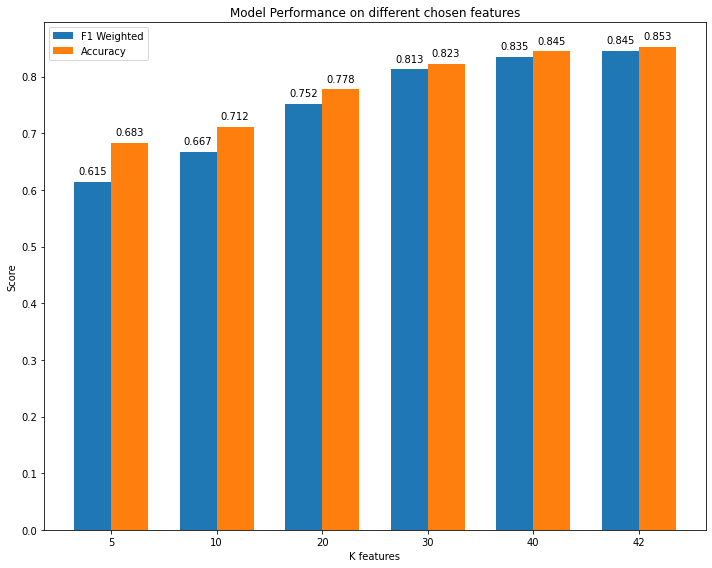

In [18]:
k_f1_weighted_scores = [k_best_result[k]['F1 Weighted'] for k in k_features]
k_accuracy_scores = [k_best_result[k]['Accuracy'] for k in k_features]
fig, ax = plt.subplots(figsize=(10,8))

bar_width = 0.35

index = np.arange(len(k_features))
bar1_positions = index - bar_width / 2
bar2_positions = index + bar_width / 2

plt.bar(bar1_positions, k_f1_weighted_scores, bar_width, label='F1 Weighted')

plt.bar(bar2_positions, k_accuracy_scores, bar_width, label='Accuracy')

plt.xticks(index, k_features)

plt.xlabel('K features')
plt.ylabel('Score')
plt.title('Model Performance on different chosen features')

for i, v in enumerate(k_f1_weighted_scores):
    plt.text(bar1_positions[i], v + 0.01, str(round(v, 3)), ha='center', va='bottom')

for i, v in enumerate(k_accuracy_scores):
    plt.text(bar2_positions[i], v + 0.01, str(round(v, 3)), ha='center', va='bottom')


plt.legend()

plt.tight_layout()
plt.show()

In the graph above we can see that our model performs better as the number of K best feature grows.

# The metrics

#### We decided to use 2 different metrics:

##### 1. F1 Weighted Score:
The F1 weighted score is a metric that combines precision and recall for multi-class classification tasks. It calculates the average F1 score, giving more weight to classes with higher support, providing an overall assessment of the model's performance while accounting for class imbalance. It's a useful metric to evaluate classification models on imbalanced datasets.

##### 2. Accuracy Score:
Accuracy is a commonly used metric to evaluate classification models. It measures the proportion of correctly predicted samples out of the total samples in the dataset. It provides a general indication of the model's overall correctness. However, accuracy may not be suitable for imbalanced datasets as it can be biased towards the majority class and overlook minority classes.







It is interesting to examine both metrics results because of the fact that our dataset is imbalanced.

F1 Weighted metric is a useful metric for imbalanced datasets, while the Accuracy metric may not be the best fit for imbalanced datasets.

Our initial hypothesis is F1 Weighted metric would perform better results.

# Hyperparameter search

After we have selected our model with a little hyperparameter flexibility, we will now run an extensive hyperparameter search.

As discribed above, the Accuracy metric performed better than F1 Weighted metric, so we'll be using this metric.

We viewed many of the XGB hyperparameters and decided to focus on optimizing the hyperparameters below.

#### XGB Hyperparameters:
- n_estimators
- learning_rate
- max_depth
- subsample
- gamma
- reg_lambda
- min_child_weight




In [19]:
chosen_model = XGBClassifier()

XGB_hyperparam_grid = {
    'n_estimators': [50, 100 , 200 , 500, 800, 1000],
    'learning_rate': [0.1, 0.2, 0.25, 0.3, 0.35, 0.5],
    'max_depth': [3, 5, 7, 10, 15],
    'subsample' : [0.1, 0.3, 0.5, 0.8, 1],
    'gamma': [0.1, 0.3, 0.5, 1, 3, 5],
    'reg_lambda' : [0.1, 0.5, 1, 3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 8, 10, 15]
}

In [20]:
X_full_train = np.concatenate((X_train, X_validation), axis=0)
y_full_train = np.concatenate((y_train, y_validation), axis=0)
test_s = np.zeros(X_full_train.shape[0])
test_s[:X_train.shape[0]] = -1
predefined_split = PredefinedSplit(test_s)

In [21]:
random_search = RandomizedSearchCV(
    estimator=chosen_model,
    param_distributions=XGB_hyperparam_grid,
    scoring='accuracy',
    n_iter=10,  
    cv=predefined_split,
    random_state=42
)

random_search.fit(X_full_train, y_full_train)

print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Hyperparameters: {'subsample': 0.5, 'reg_lambda': 9, 'n_estimators': 1000, 'min_child_weight': 15, 'max_depth': 10, 'learning_rate': 0.3, 'gamma': 1}
Best Score: 0.8533895796329188


# Testing our work on test set

In [22]:
test_model = XGBClassifier(**random_search.best_params_)
test_model.fit(X_full_train, y_full_train)
y_pred = test_model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
f1_weighted_score = f1_score(y_test, y_pred, average='weighted')
print(f"Test Accuracy score: {acc_score}")
print(f"Test F1 weighted score: {f1_weighted_score}")


Test Accuracy score: 0.8532415630550622
Test F1 weighted score: 0.8438885176246786
